In [13]:
from pathlib import Path
from datetime import datetime
import matplotlib.pyplot as plt
import csv

solution 1

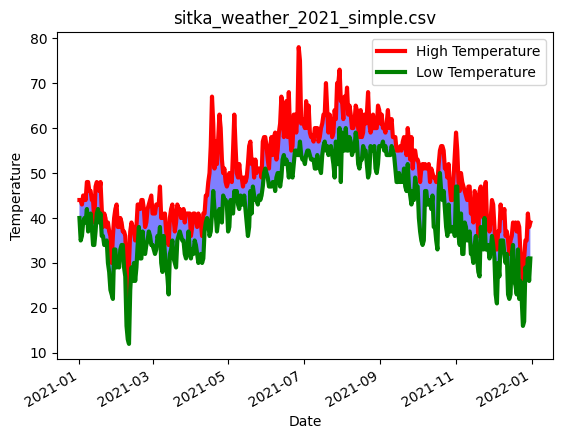

In [14]:
def function_high_temp(filepath,linewidth1 = 3, show_low_temp = 0):
    path = Path(filepath)
    lines = path.read_text().splitlines()
    reader = csv.reader(lines)
    header_row = next(reader)

    fig, ax = plt.subplots()
    ax.set_title(path.name)
    ax.set_xlabel('Date')
    ax.set_ylabel('Temperature')
    fig.autofmt_xdate()

    index_date = header_row.index('DATE')
    date = []
    for row in reader:
        date.append(datetime.strptime(row[index_date],'%Y-%m-%d'))

    reader = csv.reader(lines)
    header_row = next(reader)
    if show_low_temp == 0:
        index_high = header_row.index('TMAX')
        high = []
        for row in reader:
            high.append(int(row[index_high]))
        ax.plot(date,high,linewidth = linewidth1,color = 'red' )
        ax.legend(['High Temperature'])
        
    elif show_low_temp == 1:
        index_low = header_row.index('TMIN')
        low = []
        for row in reader:
            low.append(int(row[index_low]))
        ax.plot(date,low,linewidth = linewidth1 ,color = 'green')
        ax.legend(['Low Temperature'])
    else:
        index_high = header_row.index('TMAX')
        index_low = header_row.index('TMIN')
        high = []
        low = []
        for row in reader:
            high.append(int(row[index_high]))
            low.append(int(row[index_low]))
        ax.plot(date,high,linewidth = linewidth1 ,color = 'red')
        ax.plot(date,low,linewidth = linewidth1, color = 'green' )
        ax.legend(['High Temperature', 'Low Temperature'])
        ax.fill_between(date,high,low, facecolor='blue', alpha=0.5)   
    
    plt.show()
function_high_temp(r"C:\Users\Gymnasiet\Desktop\Projects\DataPartCourse\chapter16-DowloadingData\sitka_weather_2021_simple.csv",show_low_temp = 2)

Solution 2

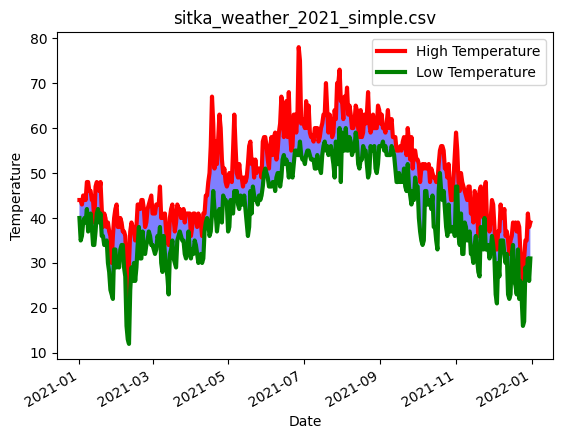

In [15]:
def extract_data(reader,column_name = 'TMAX', flag = 0):
    header_row = next(reader)
    
    if flag == 0:
        index_date = header_row.index('DATE')
        index = header_row.index(column_name)
        data_list = []
        date = []
        for row in reader:
            date.append(datetime.strptime(row[index_date],'%Y-%m-%d'))
            data_list.append(int(row[index]))
        return date,data_list
    else:
        index_date = header_row.index('DATE')
        index_high = header_row.index('TMAX')
        index_low = header_row.index('TMIN')
        high = []
        low = []
        date = []
        for row in reader:
            date.append(datetime.strptime(row[index_date],'%Y-%m-%d'))
            high.append(int(row[index_high]))
            low.append(int(row[index_low]))
        return date,high,low

def function_high_temp(filepath,linewidth1 = 3, show_low_temp = 0):

    path = Path(filepath)
    lines = path.read_text().splitlines()
    reader = csv.reader(lines)
  
    fig, ax = plt.subplots()
    ax.set_title(path.name)
    ax.set_xlabel('Date')
    ax.set_ylabel('Temperature')
    fig.autofmt_xdate()

    
    if show_low_temp == 0:
        date, high = extract_data(reader,'TMAX',0)
        ax.plot(date,high,linewidth = linewidth1 ,color = 'red')
        plt.show()

    elif show_low_temp == 1:
        date, low = extract_data(reader,'TMIN',0)
        ax.plot(date,low,linewidth = linewidth1, color = 'green' )
        plt.show()

    else:
        date,high,low = extract_data(reader, flag = 1)
        
        ax.plot(date,high,linewidth = linewidth1 ,color = 'red')
        ax.plot(date,low,linewidth = linewidth1, color = 'green' )
        ax.legend(['High Temperature', 'Low Temperature'])
        ax.fill_between(date,high,low, facecolor='blue', alpha=0.5)   
        plt.show()


function_high_temp(r"C:\Users\Gymnasiet\Desktop\Projects\DataPartCourse\chapter16-DowloadingData\sitka_weather_2021_simple.csv",show_low_temp = 2)

solution 3

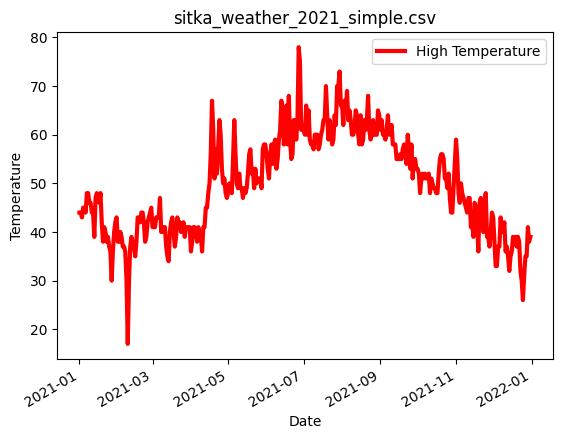

In [16]:
import pandas as pd

def function_high_temp(filepath,linewidth1 = 3, show_low_temp = 0):
    path = Path(filepath)
    df = pd.read_csv(filepath)
    date = pd.to_datetime(df['DATE'])
    high = df['TMAX']
    low = df['TMIN']

    fig, ax = plt.subplots()
    ax.set_title(path.name)
    ax.set_xlabel('Date')
    ax.set_ylabel('Temperature')
    fig.autofmt_xdate()

    if show_low_temp == 0:
        ax.plot(date,high,linewidth = linewidth1 ,color = 'red')
        ax.legend(['High Temperature'])
        plt.show()

    elif show_low_temp == 1:
        ax.plot(date,low,linewidth = linewidth1, color = 'green' )
        ax.legend(['Low Temperature'])
        plt.show()

    else:      
        ax.plot(date,high,linewidth = linewidth1 ,color = 'red')
        ax.plot(date,low,linewidth = linewidth1, color = 'green' )
        ax.legend(['High Temperature', 'Low Temperature'])
        ax.fill_between(date,high,low, facecolor='blue', alpha=0.5)   
        plt.show()
    

function_high_temp(r"C:\Users\Gymnasiet\Desktop\Projects\DataPartCourse\chapter16-DowloadingData\sitka_weather_2021_simple.csv",show_low_temp = 0)